## imports for the project

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from matplotlib import rcParams
from sklearn.decomposition import PCA
# 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ml algoritems
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NeighborhoodComponentsAnalysis

# score tests 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# 
from pandas.plotting import radviz
import matplotlib.pyplot as mplt
import matplotlib.cm as cm
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import PrecisionRecallDisplay
import time
import random
import math
%matplotlib inline

## Crawling by selenium

In [2]:
url_1 = "https://www.futbin.com/"
url_2 = "/players?page="
url_3 = "&showStats=Sprintspeed,Finishing,Agility,Balance,Marking,Vision&version=gold_rare"

In [3]:
data = {"NAME":[],"RAT":[],"POS":[],"VER":[],"PS":[],"SKI":[],"WF":[],"WR":[],"PAC":[],"SHO":[],"PAS":[],"DRI":[],"DEF":[]
       ,"PHY":[],"HEIGHT":[],"POP":[],"BS":[],"IGS":[] ,"AGI":[],"BAL":[],"MAR":[],"SS":[],"VIS":[],"FIN":[]}
pages = [41, 42, 32, 33, 29, 21]

In [4]:
index = 0 # Using the index, we can determine how many pages were used in which year
for year in range(17,23):
    pages_in_year = int(pages[index]) + 1
    for page in range(1,pages_in_year): 
        driver = webdriver.Firefox(executable_path=r'C:\Users\matan\Downloads\My_Fifa_project\geckodriver.exe')
        driver.get(f"{url_1}{year}{url_2}{page}{url_3}")
        try:
            table = WebDriverWait(driver, 5).until(
                    EC.presence_of_element_located((By.ID, "repTb")) # The class that contains the main table
                )
            body = table.find_element_by_tag_name("tbody") # the tag that contains the table with the stats
            rows = body.find_elements_by_tag_name("tr") # the tag that contains the players stats only !
            for row in rows:
                cols = row.find_elements_by_tag_name("td") # the tag that contains the stats only 
                for key,table_item in zip(data.keys(),cols):
                    data[key].append(table_item.text)
        finally:
            driver.quit()
    index += 1

In [5]:
df = pd.DataFrame({"Name":data["NAME"],"Rating":data["RAT"],"Position":data["POS"],"Version":data["VER"],
                  "Price":data["PS"],"Skills":data["SKI"],"Weak_Foot":data["WF"],"Attack\Defense":data["WR"],
                  "Pace":data["PAC"],"Shooting":data["SHO"],"Passing":data["PAS"],"Dribbling":data["DRI"],
                  "Defending":data["DEF"],"Physicality":data["PHY"],"Height":data["HEIGHT"],"Popularity":data["POP"],
                  "Base_Stats":data["BS"],"Game_Stats":data["IGS"],"Agility":data["AGI"],"Balance":data["BAL"],
                  "Marking":data["MAR"],"Positioning":data["POS"],"Sprint_Speed":data["SS"],"Vision":data["VIS"],
                  "Finishing":data["FIN"]
                  }) # put the data into DataFrame

In [6]:
df

,Name,Rating,Position,Version,Price,Skills,Weak_Foot,Attack\Defense,Pace,Shooting,...,Popularity,Base_Stats,Game_Stats,Agility,Balance,Marking,Positioning,Sprint_Speed,Vision,Finishing
0,Cristiano Ronaldo,94,LW,Normal,535K,5,4,H \ L,92,92,...,347,469,-,90,63,22,LW,92,85,93
1,Messi,93,RW,Normal,320K,4,4,M \ M,89,90,...,357,448,-,90,95,13,RW,87,90,95
2,Neuer,92,GK,Normal,48K,1,4,M \ M,89,90,...,61,512,-,52,35,10,GK,61,70,13
3,Suárez,92,ST,Normal,101K,4,4,H \ M,82,90,...,113,459,-,86,60,30,ST,77,84,94
4,Neymar,92,LW,Normal,140K,5,5,H \ M,91,84,...,218,434,-,96,82,21,LW,90,80,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5857,Joško Gvardiol,75,CB,Normal,0,3,4,H \ H,83,54,...,611,429,2002,66,60,67,CB,87,65,42
5858,Lago Júnior,75,LM,Rare,650,4,4,M \ L,87,72,...,-3,403,1817,76,60,58,LM,86,66,73
5859,Mauro Boselli,75,ST,Rare,650,3,3,H \ M,55,76,...,2,378,1831,60,52,39,ST,55,65,83
5860,Lisandro López,75,ST,Rare,650,4,4,H \ H,63,77,...,4,398,1981,69,69,35,ST,63,69,77


In [7]:
df.to_csv("FifaPlayers1.csv")

## data cleaning part 🧹

In [8]:
cols = list(range(2,25))
temp_df = pd.read_csv(r'FifaPlayers1.csv', usecols=cols)

In [9]:
df = temp_df.drop(['Version','Price', 'Attack\Defense','Game_Stats', 'Base_Stats', 'Popularity', 'Rating',
                   'Weak_Foot','Skills'],axis=1) 
# Getting rid of unnecessary colums and dropping duplicates

In [10]:
df

,Position,Pace,Shooting,Passing,Dribbling,Defending,Physicality,Height,Agility,Balance,Marking,Sprint_Speed,Vision,Finishing
0,LW,92,92,81,91,33,80,"185cm | 6'0""",90.0,63.0,22.0,92.0,85.0,93.0
1,RW,89,90,86,96,26,61,"170cm | 5'6""",90.0,95.0,13.0,87.0,90.0,95.0
2,GK,89,90,95,89,58,91,"193cm | 6'3""",52.0,35.0,10.0,61.0,70.0,13.0
3,ST,82,90,79,87,42,79,"182cm | 5'11""",86.0,60.0,30.0,77.0,84.0,94.0
4,LW,91,84,78,95,30,56,"174cm | 5'8""",96.0,82.0,21.0,90.0,80.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5857,CB,83,54,67,71,71,83,"185cm | 6'1""\nHigh & Average (80kg)",66.0,60.0,67.0,87.0,65.0,42.0
5858,LM,87,72,64,74,34,72,"180cm | 5'11""\nLean (79kg)",76.0,60.0,58.0,86.0,66.0,73.0
5859,ST,55,76,64,69,39,75,"185cm | 6'1""\nHigh & Average (75kg)",60.0,52.0,39.0,55.0,65.0,83.0
5860,ST,63,77,70,74,49,65,"174cm | 5'9""\nAverage (74kg)",69.0,69.0,35.0,63.0,69.0,77.0


In [11]:
df = df.drop_duplicates()
df

,Position,Pace,Shooting,Passing,Dribbling,Defending,Physicality,Height,Agility,Balance,Marking,Sprint_Speed,Vision,Finishing
0,LW,92,92,81,91,33,80,"185cm | 6'0""",90.0,63.0,22.0,92.0,85.0,93.0
1,RW,89,90,86,96,26,61,"170cm | 5'6""",90.0,95.0,13.0,87.0,90.0,95.0
2,GK,89,90,95,89,58,91,"193cm | 6'3""",52.0,35.0,10.0,61.0,70.0,13.0
3,ST,82,90,79,87,42,79,"182cm | 5'11""",86.0,60.0,30.0,77.0,84.0,94.0
4,LW,91,84,78,95,30,56,"174cm | 5'8""",96.0,82.0,21.0,90.0,80.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5856,LB,89,60,69,75,69,69,"176cm | 5'9""\nLean (69kg)",81.0,74.0,71.0,89.0,65.0,60.0
5857,CB,83,54,67,71,71,83,"185cm | 6'1""\nHigh & Average (80kg)",66.0,60.0,67.0,87.0,65.0,42.0
5859,ST,55,76,64,69,39,75,"185cm | 6'1""\nHigh & Average (75kg)",60.0,52.0,39.0,55.0,65.0,83.0
5860,ST,63,77,70,74,49,65,"174cm | 5'9""\nAverage (74kg)",69.0,69.0,35.0,63.0,69.0,77.0


In [12]:
split_height = df["Height"].str.split("cm",n=1,expand=True)
split_height.rename(columns={0:'Player_Height',1:'Delete'})
# I created a new table to separate the height from the rest of the string

,Player_Height,Delete
0,185,"| 6'0"""
1,170,"| 5'6"""
2,193,"| 6'3"""
3,182,"| 5'11"""
4,174,"| 5'8"""
...,...,...
5856,176,"| 5'9""\nLean (69kg)"
5857,185,"| 6'1""\nHigh & Average (80kg)"
5859,185,"| 6'1""\nHigh & Average (75kg)"
5860,174,"| 5'9""\nAverage (74kg)"


In [13]:
df[['Player_Height','Delete']] = df['Height'].str.split("cm",n=1,expand=True)
df = df.drop(['Delete', 'Height'],axis=1)
df['Player_Height'] = df['Player_Height'].str.replace(r'\D', '').astype(int) # delete the characters that not number
df['Player_Height'].describe(include='all')
df.drop(df.loc[df["Player_Height"] < 150].index, inplace=True)

C:\Users\matan\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\matan\AppData\Local\Temp/ipykernel_16324/2819124264.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Player_Height'] = df['Player_Height'].str.replace(r'\D', '').astype(int) # delete the characters that not number


In [14]:
df

,Position,Pace,Shooting,Passing,Dribbling,Defending,Physicality,Agility,Balance,Marking,Sprint_Speed,Vision,Finishing,Player_Height
0,LW,92,92,81,91,33,80,90.0,63.0,22.0,92.0,85.0,93.0,185
1,RW,89,90,86,96,26,61,90.0,95.0,13.0,87.0,90.0,95.0,170
2,GK,89,90,95,89,58,91,52.0,35.0,10.0,61.0,70.0,13.0,193
3,ST,82,90,79,87,42,79,86.0,60.0,30.0,77.0,84.0,94.0,182
4,LW,91,84,78,95,30,56,96.0,82.0,21.0,90.0,80.0,89.0,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5856,LB,89,60,69,75,69,69,81.0,74.0,71.0,89.0,65.0,60.0,176
5857,CB,83,54,67,71,71,83,66.0,60.0,67.0,87.0,65.0,42.0,185
5859,ST,55,76,64,69,39,75,60.0,52.0,39.0,55.0,65.0,83.0,185
5860,ST,63,77,70,74,49,65,69.0,69.0,35.0,63.0,69.0,77.0,174


In [15]:
df.drop(df.loc[df["Agility"] == '-'].index, inplace=True)
# Delete the characters that not number

In [16]:
df.drop(df.loc[df["Position"] == 'GK'].index, inplace=True)
# Removed the goalkeepers from the table

In [17]:
position_dict = {"ST":1 ,"CF":1 ,"RF":2, "RW":2, "LF":2, "LW":2, "LM":2, "RM":2, "CAM":2, "CM":3,
                  "CDM":3, "LB":4, "RB":4, "LWB":4, "RWB":4, "CB":5}
df['Position'] = df['Position'].replace(position_dict).astype(int)
# Combining several positions and giving them values

In [18]:
df

,Position,Pace,Shooting,Passing,Dribbling,Defending,Physicality,Agility,Balance,Marking,Sprint_Speed,Vision,Finishing,Player_Height
0,2,92,92,81,91,33,80,90.0,63.0,22.0,92.0,85.0,93.0,185
1,2,89,90,86,96,26,61,90.0,95.0,13.0,87.0,90.0,95.0,170
3,1,82,90,79,87,42,79,86.0,60.0,30.0,77.0,84.0,94.0,182
4,2,91,84,78,95,30,56,96.0,82.0,21.0,90.0,80.0,89.0,174
6,1,72,90,81,85,31,86,86.0,41.0,15.0,74.0,83.0,90.0,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5856,4,89,60,69,75,69,69,81.0,74.0,71.0,89.0,65.0,60.0,176
5857,5,83,54,67,71,71,83,66.0,60.0,67.0,87.0,65.0,42.0,185
5859,1,55,76,64,69,39,75,60.0,52.0,39.0,55.0,65.0,83.0,185
5860,1,63,77,70,74,49,65,69.0,69.0,35.0,63.0,69.0,77.0,174


In [19]:
df.dropna(inplace=True)
df['Marking'] = df['Marking'].astype(int)
df['Balance'] = df['Balance'].astype(int)
df['Agility'] = df['Agility'].astype(int)
df['Player_Height'] = df['Player_Height'].astype(int)
df['Sprint_Speed'] = df['Sprint_Speed'].astype(int)
df['Vision'] = df['Vision'].astype(int)
df['Finishing'] = df['Finishing'].astype(int)

# Changed the type to int

In [20]:
df

,Position,Pace,Shooting,Passing,Dribbling,Defending,Physicality,Agility,Balance,Marking,Sprint_Speed,Vision,Finishing,Player_Height
0,2,92,92,81,91,33,80,90,63,22,92,85,93,185
1,2,89,90,86,96,26,61,90,95,13,87,90,95,170
3,1,82,90,79,87,42,79,86,60,30,77,84,94,182
4,2,91,84,78,95,30,56,96,82,21,90,80,89,174
6,1,72,90,81,85,31,86,86,41,15,74,83,90,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5856,4,89,60,69,75,69,69,81,74,71,89,65,60,176
5857,5,83,54,67,71,71,83,66,60,67,87,65,42,185
5859,1,55,76,64,69,39,75,60,52,39,55,65,83,185
5860,1,63,77,70,74,49,65,69,69,35,63,69,77,174


## we change the players position to numbers: 
 * ST = 1 , CF = 1
 * RF = 2 , RW = 2 , LF = 2 , LW = 2 , LM = 2 , RM = 2
 * CAM = 3 , CM = 3 , CDM = 3
 * LB = 4 , RB = 4 , LWB = 4 , RWB = 4
 * CB = 5

In [21]:
df['Position'].value_counts()

2    1435
3     995
1     869
5     754
4     637
Name: Position, dtype: int64

In [22]:
df = df.drop(df[df['Position'] == 2].sample(frac=0.6).index)
df = df.drop(df[df['Position'] == 1].sample(frac=0.31).index)
df = df.drop(df[df['Position'] == 3].sample(frac=0.33).index)
df = df.drop(df[df['Position'] == 5].sample(frac=0.24).index)

In [23]:
df['Position'].value_counts()

3    667
4    637
1    600
2    574
5    573
Name: Position, dtype: int64

In [24]:
df

,Position,Pace,Shooting,Passing,Dribbling,Defending,Physicality,Agility,Balance,Marking,Sprint_Speed,Vision,Finishing,Player_Height
0,2,92,92,81,91,33,80,90,63,22,92,85,93,185
3,1,82,90,79,87,42,79,86,60,30,77,84,94,182
6,1,72,90,81,85,31,86,86,41,15,74,83,90,195
7,2,94,87,84,86,57,76,77,65,51,95,79,87,183
9,1,81,87,74,85,38,82,78,79,25,82,78,91,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5855,2,87,71,61,80,52,68,84,73,53,89,58,80,189
5856,4,89,60,69,75,69,69,81,74,71,89,65,60,176
5857,5,83,54,67,71,71,83,66,60,67,87,65,42,185
5859,1,55,76,64,69,39,75,60,52,39,55,65,83,185


In [25]:
df.describe()

,Position,Pace,Shooting,Passing,Dribbling,Defending,Physicality,Agility,Balance,Marking,Sprint_Speed,Vision,Finishing,Player_Height
count,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000
mean,3.002950,75.937398,66.002294,71.050803,75.506719,62.449033,73.933792,73.236971,69.962307,60.533596,76.371026,69.621763,62.704359,181.258604
std,1.391187,10.921524,13.660749,8.697901,8.177992,19.657550,8.360183,12.318368,13.472117,21.824887,10.942652,12.000458,17.028167,6.720777
min,1.000000,27.000000,18.000000,36.000000,38.000000,16.000000,43.000000,26.000000,27.000000,10.000000,28.000000,20.000000,10.000000,160.000000
25%,2.000000,69.000000,58.000000,66.000000,72.000000,42.000000,69.000000,66.000000,62.000000,40.000000,69.000000,64.000000,52.000000,176.000000
50%,3.000000,77.000000,70.000000,72.000000,77.000000,71.000000,75.000000,75.000000,73.000000,70.000000,77.000000,72.000000,66.000000,181.000000
75%,4.000000,84.000000,76.000000,77.000000,81.000000,79.000000,80.000000,82.000000,79.000000,78.000000,85.000000,78.000000,76.000000,186.000000
max,5.000000,97.000000,93.000000,93.000000,96.000000,92.000000,92.000000,96.000000,96.000000,94.000000,97.000000,95.000000,95.000000,199.000000


In [26]:
df.corr()

,Position,Pace,Shooting,Passing,Dribbling,Defending,Physicality,Agility,Balance,Marking,Sprint_Speed,Vision,Finishing,Player_Height
Position,1.000000,-0.268452,-0.807378,-0.270617,-0.580964,0.856270,0.352930,-0.445492,-0.326529,0.833677,-0.207843,-0.470029,-0.833442,0.239179
Pace,-0.268452,1.000000,0.205918,0.082944,0.468459,-0.376353,-0.322076,0.693757,0.545896,-0.350570,0.971114,0.075065,0.250172,-0.458007
Shooting,-0.807378,0.205918,1.000000,0.571392,0.707703,-0.654655,-0.299902,0.472468,0.377110,-0.644999,0.131175,0.684126,0.963930,-0.272941
Passing,-0.270617,0.082944,0.571392,1.000000,0.762526,-0.099001,-0.340826,0.478484,0.487285,-0.104184,-0.017374,0.892329,0.476763,-0.408536
Dribbling,-0.580964,0.468459,0.707703,0.762526,1.000000,-0.478082,-0.523504,0.795617,0.716305,-0.461182,0.351498,0.776638,0.686283,-0.577305
Defending,0.856270,-0.376353,-0.654655,-0.099001,-0.478082,1.000000,0.530485,-0.463946,-0.312321,0.971149,-0.322116,-0.286054,-0.710072,0.254268
Physicality,0.352930,-0.322076,-0.299902,-0.340826,-0.523504,0.530485,1.000000,-0.585504,-0.551016,0.486743,-0.211525,-0.345916,-0.329064,0.562281
Agility,-0.445492,0.693757,0.472468,0.478484,0.795617,-0.463946,-0.585504,1.000000,0.828511,-0.439728,0.577675,0.468636,0.490965,-0.727752
Balance,-0.326529,0.545896,0.377110,0.487285,0.716305,-0.312321,-0.551016,0.828511,1.000000,-0.282283,0.415807,0.449483,0.373026,-0.843172
Marking,0.833677,-0.350570,-0.644999,-0.104184,-0.461182,0.971149,0.486743,-0.439728,-0.282283,1.000000,-0.300162,-0.283634,-0.694528,0.225844


In [27]:
df.to_csv("FifaPlayers_AfterClean1.csv")

## the correlation part 

In [28]:
cols = list(range(1,15))
df = pd.read_csv(r'FifaPlayers_AfterClean1.csv', usecols=cols)

In [29]:
correlations=[]
arr=[]
cols1=df.columns
cols2=df.columns
i=0
for col1 in cols1:
    j=0
    for col2 in cols2:
        if col1==col2:
            break
        if df[col1].corr(df[col2])>=0.5 or df[col1].corr(df[col2])>=0.5:
            arr.append(f"({df.columns[i]}, {df.columns[j]})")
        j+=1
    i+=1
print(arr)

# function that returns tupls of high correlation attributes

['(Passing, Shooting)', '(Dribbling, Shooting)', '(Dribbling, Passing)', '(Defending, Position)', '(Physicality, Defending)', '(Agility, Pace)', '(Agility, Dribbling)', '(Balance, Pace)', '(Balance, Dribbling)', '(Balance, Agility)', '(Marking, Position)', '(Marking, Defending)', '(Sprint_Speed, Pace)', '(Sprint_Speed, Agility)', '(Vision, Shooting)', '(Vision, Passing)', '(Vision, Dribbling)', '(Finishing, Shooting)', '(Finishing, Dribbling)', '(Finishing, Vision)', '(Player_Height, Physicality)']


In [30]:
df.corr()

,Position,Pace,Shooting,Passing,Dribbling,Defending,Physicality,Agility,Balance,Marking,Sprint_Speed,Vision,Finishing,Player_Height
Position,1.000000,-0.268452,-0.807378,-0.270617,-0.580964,0.856270,0.352930,-0.445492,-0.326529,0.833677,-0.207843,-0.470029,-0.833442,0.239179
Pace,-0.268452,1.000000,0.205918,0.082944,0.468459,-0.376353,-0.322076,0.693757,0.545896,-0.350570,0.971114,0.075065,0.250172,-0.458007
Shooting,-0.807378,0.205918,1.000000,0.571392,0.707703,-0.654655,-0.299902,0.472468,0.377110,-0.644999,0.131175,0.684126,0.963930,-0.272941
Passing,-0.270617,0.082944,0.571392,1.000000,0.762526,-0.099001,-0.340826,0.478484,0.487285,-0.104184,-0.017374,0.892329,0.476763,-0.408536
Dribbling,-0.580964,0.468459,0.707703,0.762526,1.000000,-0.478082,-0.523504,0.795617,0.716305,-0.461182,0.351498,0.776638,0.686283,-0.577305
Defending,0.856270,-0.376353,-0.654655,-0.099001,-0.478082,1.000000,0.530485,-0.463946,-0.312321,0.971149,-0.322116,-0.286054,-0.710072,0.254268
Physicality,0.352930,-0.322076,-0.299902,-0.340826,-0.523504,0.530485,1.000000,-0.585504,-0.551016,0.486743,-0.211525,-0.345916,-0.329064,0.562281
Agility,-0.445492,0.693757,0.472468,0.478484,0.795617,-0.463946,-0.585504,1.000000,0.828511,-0.439728,0.577675,0.468636,0.490965,-0.727752
Balance,-0.326529,0.545896,0.377110,0.487285,0.716305,-0.312321,-0.551016,0.828511,1.000000,-0.282283,0.415807,0.449483,0.373026,-0.843172
Marking,0.833677,-0.350570,-0.644999,-0.104184,-0.461182,0.971149,0.486743,-0.439728,-0.282283,1.000000,-0.300162,-0.283634,-0.694528,0.225844


Text(0.5, 1.0, 'The correlation  matrix')

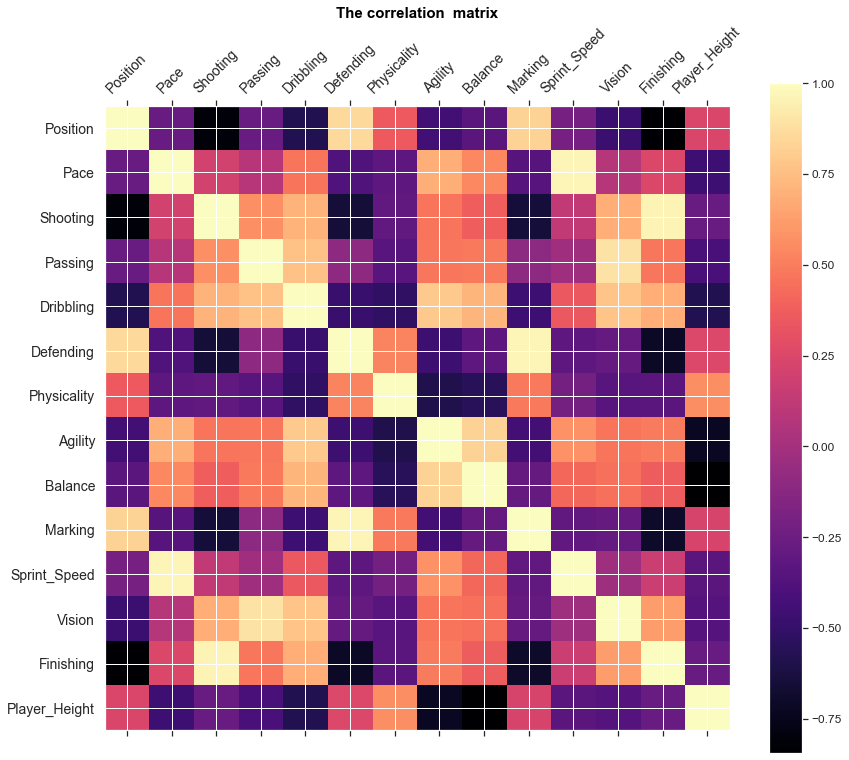

In [31]:
f = plt.figure(figsize=(14, 12))
plt.matshow(df.corr(), fignum=f.number, cmap = 'magma')

plt.xticks(range(df.select_dtypes(['number']).shape[1]),
           df.select_dtypes(['number']).columns, fontsize=14, rotation=45)

plt.yticks(range(df.select_dtypes(['number']).shape[1]),
           df.select_dtypes(['number']).columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title("The correlation  matrix", fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'black'})

## EDA Part 📊
 * Analyze the position distribution of players
 * Analyze the relationships between attributes

C:\Users\matan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

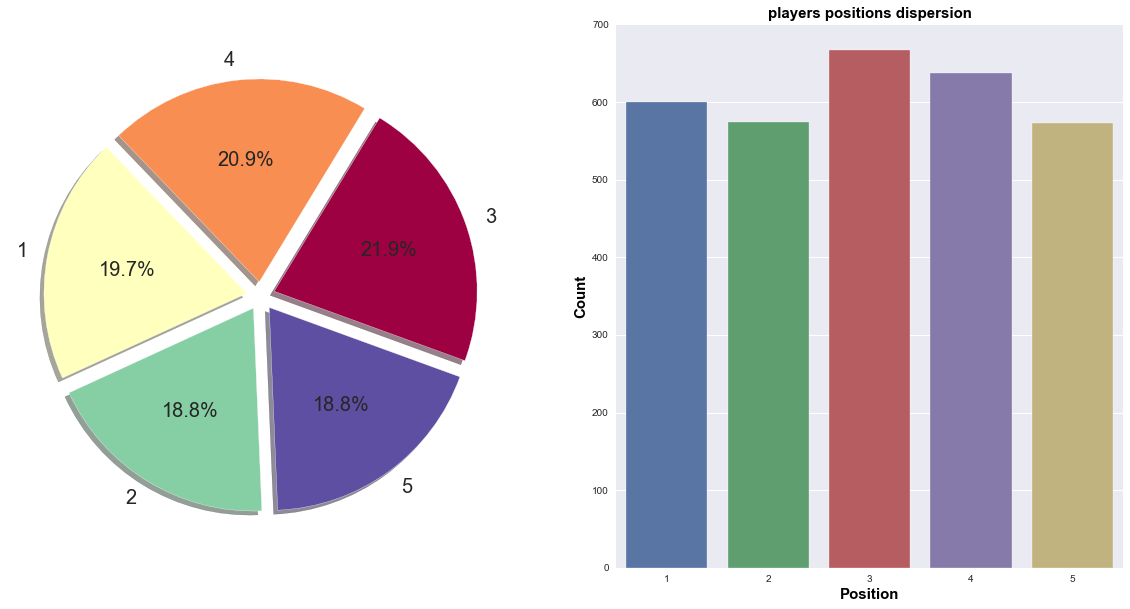

In [32]:
explode = (0.07, 0.07, 0.07, 0.07, 0.07)
plt.style.use('seaborn')
fig, axes = plt.subplots(1,2, figsize=(20,10))

sns.countplot(df["Position"])
df['Position'].value_counts().plot(ax=axes[0], kind='pie', ylabel='', subplots=True,cmap='Spectral', shadow=True,
                                    explode=explode, autopct='%1.1f%%', startangle=-20, fontsize=20)
plt.title('players positions dispersion',
         fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'black'})
plt.xlabel('Position',
          fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel('Count',
          fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'black'})


# plots of the dispersion of players positions

<AxesSubplot:xlabel='Position', ylabel='Finishing'>

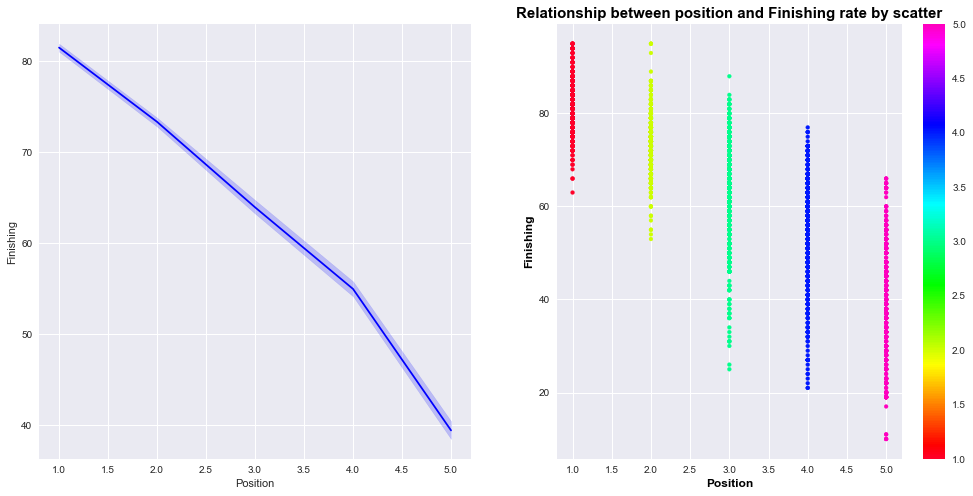

In [33]:
fig, axes = plt.subplots(1,2, figsize=(17,8))
s = df.iloc[9] = np.abs(df.iloc[1])
rcParams['figure.figsize'] = 8,6
plt.scatter(df["Position"], df["Finishing"],
            c=df["Position"], cmap='gist_rainbow', s=15)
plt.title('Relationship between position and Finishing rate by scatter',
         fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'black'})
plt.xlabel('Position',
          fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel('Finishing',
          fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})
plt.colorbar()
sns.lineplot(ax=axes[0] ,x='Position', y='Finishing', data=df, color="blue")

<AxesSubplot:xlabel='Position', ylabel='Pace'>

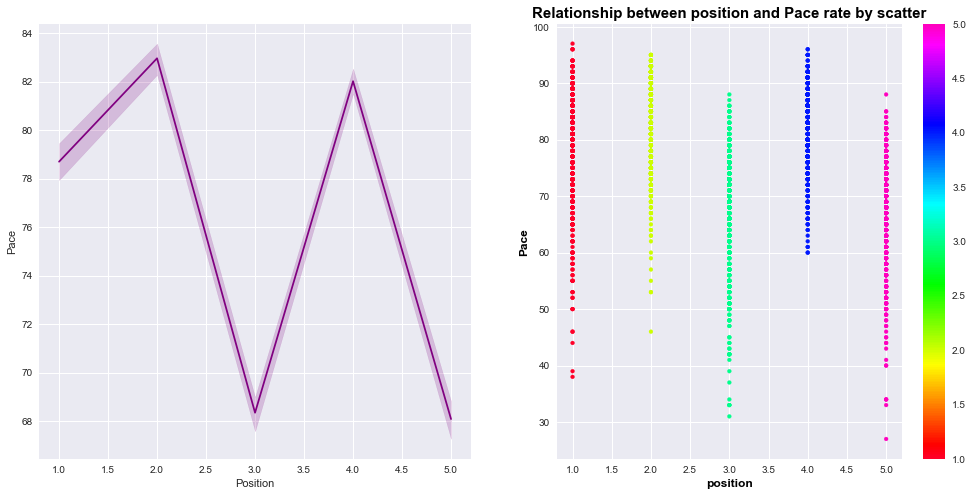

In [34]:
fig, axes = plt.subplots(1,2, figsize=(17,8))
s = df.iloc[9] = np.abs(df.iloc[1])
rcParams['figure.figsize'] = 8,6
plt.scatter(df["Position"], df["Pace"],
            c=df["Position"], cmap='gist_rainbow', s=15)
plt.title('Relationship between position and Pace rate by scatter',
         fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'black'})
plt.xlabel('position',
          fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel('Pace',
          fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})
plt.colorbar()
sns.lineplot(ax=axes[0] ,x='Position', y='Pace', data=df, color="purple")

<AxesSubplot:xlabel='Position', ylabel='Defending'>

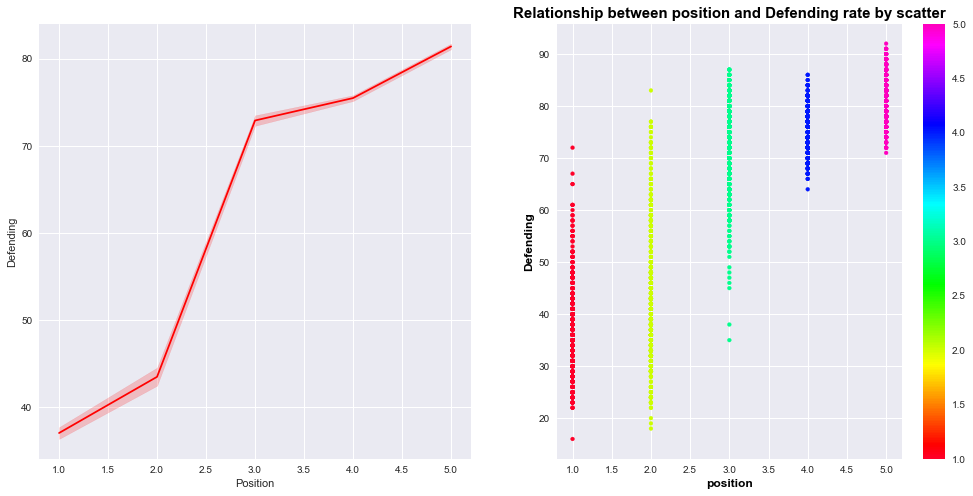

In [35]:
fig, axes = plt.subplots(1,2, figsize=(17,8))
s = df.iloc[9] = np.abs(df.iloc[1])
rcParams['figure.figsize'] = 8,6
plt.scatter(df["Position"], df["Defending"],
            c=df["Position"], cmap='gist_rainbow', s=15)
plt.title('Relationship between position and Defending rate by scatter',
         fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'black'})
plt.xlabel('position',
          fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel('Defending',
          fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})
plt.colorbar()
sns.lineplot(ax=axes[0] ,x='Position', y='Defending', data=df, color="red")

<AxesSubplot:xlabel='Position', ylabel='Shooting'>

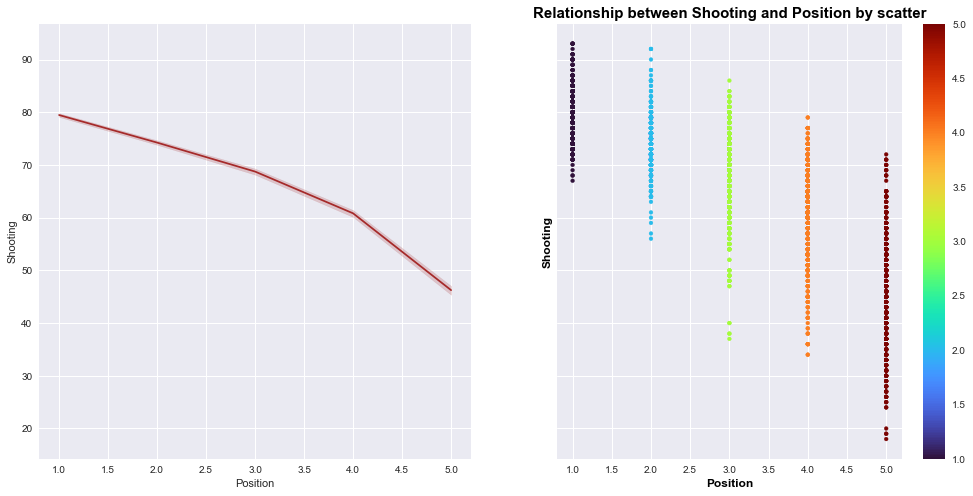

In [36]:
fig, axes = plt.subplots(1,2, figsize=(17, 8), sharey=True)
rcParams['figure.figsize'] = 8,6

plt.scatter(df["Position"], df["Shooting"],
            c=df["Position"], cmap='turbo', s=15)

plt.title('Relationship between Shooting and Position by scatter',
         fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'black'})

plt.xlabel('Position',
          fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})

plt.ylabel('Shooting',
          fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})
plt.colorbar()
sns.lineplot(ax=axes[0] ,x='Position', y='Shooting', data=df, color="brown")

<AxesSubplot:xlabel='Position', ylabel='Physicality'>

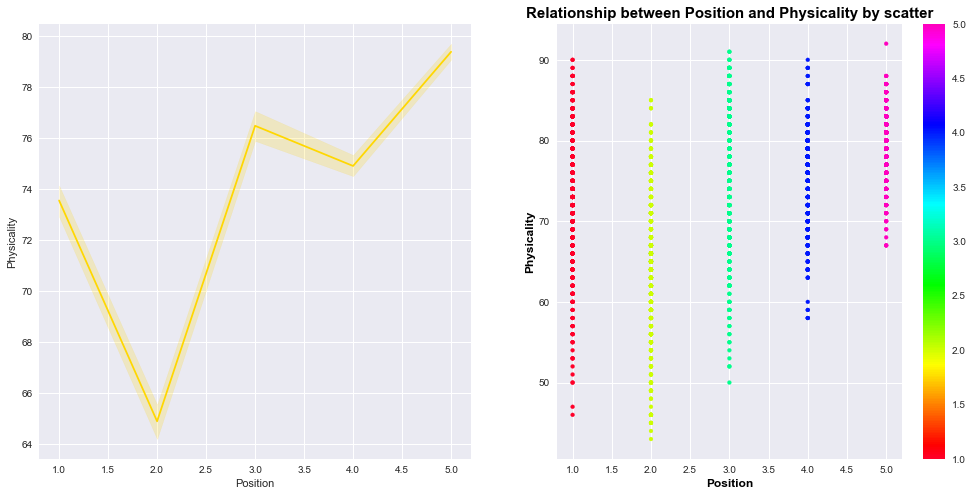

In [37]:
fig, axes = plt.subplots(1,2, figsize=(17,8))
s = df.iloc[9] = np.abs(df.iloc[1])
rcParams['figure.figsize'] = 8,6

plt.scatter(df["Position"], df["Physicality"],
            c=df["Position"], cmap='gist_rainbow', s=15)

plt.title('Relationship between Position and Physicality by scatter',
         fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'black'})

plt.xlabel('Position',
          fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})

plt.ylabel('Physicality',
          fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})

plt.colorbar()

sns.lineplot(ax=axes[0] ,x='Position', y='Physicality', data=df, color="gold")

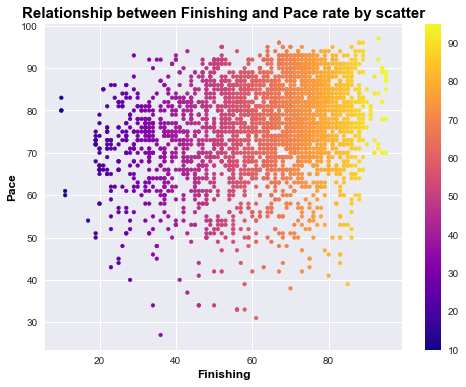

In [38]:
rcParams['figure.figsize'] = 8,6

plt.scatter(df["Finishing"], df["Pace"],
            c=df["Finishing"], cmap='plasma', s=15)

plt.title('Relationship between Finishing and Pace rate by scatter',
         fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'black'})

plt.xlabel('Finishing',
          fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})

plt.ylabel('Pace',
          fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})

plt.colorbar()

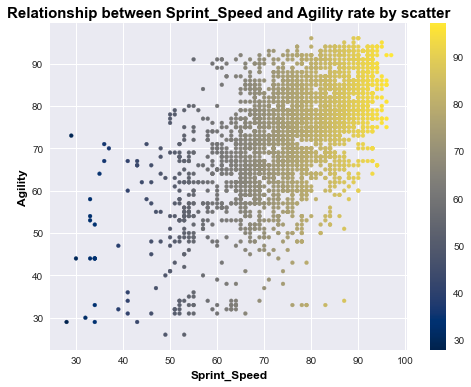

In [39]:
rcParams['figure.figsize'] = 8,6

plt.scatter(df["Sprint_Speed"], df["Agility"],
            c=df["Sprint_Speed"], cmap='cividis', s=15)

plt.title('Relationship between Sprint_Speed and Agility rate by scatter',
         fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'black'})

plt.xlabel('Sprint_Speed',
          fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})

plt.ylabel('Agility',
          fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})

plt.colorbar()

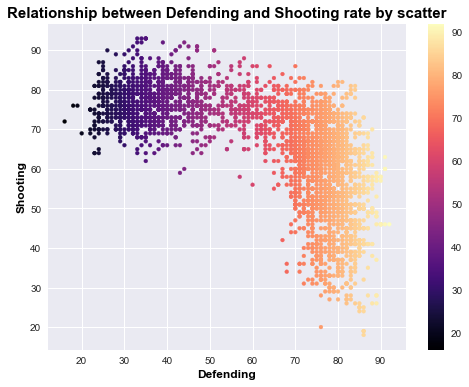

In [40]:
rcParams['figure.figsize'] = 8,6

plt.scatter(df["Defending"], df["Shooting"],
            c=df["Defending"], cmap='magma', s=15)

plt.title('Relationship between Defending and Shooting rate by scatter',
         fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'black'})

plt.xlabel('Defending',
          fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})

plt.ylabel('Shooting',
          fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})

plt.colorbar()

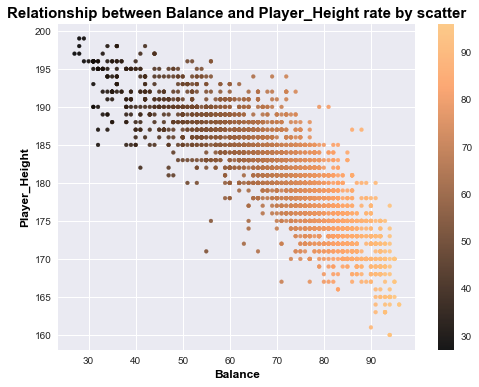

In [41]:
rcParams['figure.figsize'] = 8,6

plt.scatter(df["Balance"], df["Player_Height"],alpha=0.9,
            c=df["Balance"], cmap='copper', s=15)

plt.title('Relationship between Balance and Player_Height rate by scatter',
         fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'black'})

plt.xlabel('Balance',
          fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})

plt.ylabel('Player_Height',
          fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})

plt.colorbar()

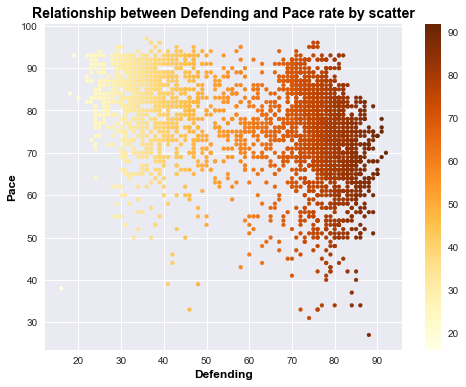

In [42]:
rcParams['figure.figsize'] = 8,6

plt.scatter(df["Defending"], df["Pace"],
            c=df["Defending"], cmap='YlOrBr', s=15)

plt.title('Relationship between Defending and Pace rate by scatter',
         fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'black'})

plt.xlabel('Defending',
          fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})

plt.ylabel('Pace',
          fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})

plt.colorbar()

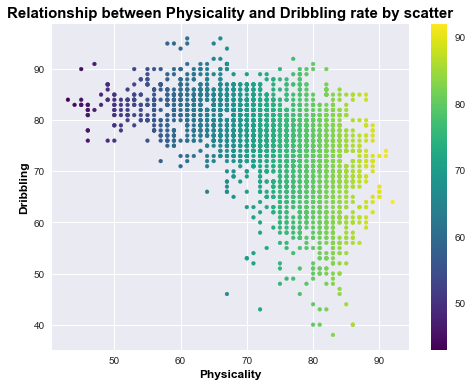

In [43]:
rcParams['figure.figsize'] = 8,6

plt.scatter(df["Physicality"], df["Dribbling"],
            c=df["Physicality"], cmap='viridis', s=15)

plt.title('Relationship between Physicality and Dribbling rate by scatter',
         fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'black'})

plt.xlabel('Physicality',
          fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})

plt.ylabel('Dribbling',
          fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})

plt.colorbar()

# Supervised Learning

In [46]:
cols = list(range(1,15))
df = pd.read_csv(r'FifaPlayers_AfterClean1.csv', usecols=cols)
df

,Position,Pace,Shooting,Passing,Dribbling,Defending,Physicality,Agility,Balance,Marking,Sprint_Speed,Vision,Finishing,Player_Height
0,2,92,92,81,91,33,80,90,63,22,92,85,93,185
1,1,82,90,79,87,42,79,86,60,30,77,84,94,182
2,1,72,90,81,85,31,86,86,41,15,74,83,90,195
3,2,94,87,84,86,57,76,77,65,51,95,79,87,183
4,1,81,87,74,85,38,82,78,79,25,82,78,91,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,2,87,71,61,80,52,68,84,73,53,89,58,80,189
3047,4,89,60,69,75,69,69,81,74,71,89,65,60,176
3048,5,83,54,67,71,71,83,66,60,67,87,65,42,185
3049,1,55,76,64,69,39,75,60,52,39,55,65,83,185


### my models:
 * Decision_Tree
 * Knn

In [47]:
def decision_tree(X_train, y_train, X_test, y_test):
    model = tree.DecisionTreeClassifier()
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    return prediction

In [48]:
def knn(X_train, y_train, X_test, y_test):
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    classifier = KNeighborsClassifier(n_neighbors=11, n_jobs=-1)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)                         
    return y_pred

# data split

In [49]:
X = df.iloc[:,1:16]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## the scores
 

 * Decision Tree Model score: 

In [53]:
y_pred = decision_tree(X_train, y_train, X_test, y_test)
print("%.6f" % precision_score(y_test, y_pred, average='macro'))
print("%.6f" % recall_score(y_test, y_pred, average='macro'))
print("%.6f" % f1_score(y_test, y_pred, average='macro'))
print("%.6f" % accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.808036
0.806934
0.806500
0.801964


array([[ 99,  16,   0,   0,   0],
       [ 17,  93,   6,   5,   0],
       [  1,  14, 105,  20,   5],
       [  0,   4,  13, 106,   5],
       [  0,   0,   6,   9,  87]], dtype=int64)

 * knn Model score:

In [54]:
y_pred = knn(X_train, y_train, X_test, y_test)
print("%.6f" % precision_score(y_test, y_pred, average='macro'))
print("%.6f" % recall_score(y_test, y_pred, average='macro'))
print("%.6f" % f1_score(y_test, y_pred, average='macro'))
print("%.6f" % accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)


0.822829
0.819729
0.820962
0.818331


array([[ 94,  18,   3,   0,   0],
       [ 17,  89,  11,   4,   0],
       [  0,   8, 118,  14,   5],
       [  0,   0,  12, 110,   6],
       [  0,   0,   8,   5,  89]], dtype=int64)

In [55]:
y_pred_dt = decision_tree(X_train, y_train, X_test, y_test)
y_pred_knn = knn(X_train, y_train, X_test, y_test)

name = ["Decision Tree", "KNN"]

recall = [recall_score(y_test, y_pred_dt, average='macro'), recall_score(y_test, y_pred_knn, average='macro')]

f1 = [f1_score(y_test, y_pred_dt, average='macro'), f1_score(y_test, y_pred_knn, average='macro')]

accuracy_s = [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_knn)]

precision = [precision_score(y_test, y_pred_dt, average='macro'), precision_score(y_test, y_pred_knn, average='macro')]

accuracy_df = pd.DataFrame({"model":name,"recall":recall, "f1":f1, "accuracy_s":accuracy_s, "precision":precision})
accuracy_df

,model,recall,f1,accuracy_s,precision
0,Decision Tree,0.805820,0.805025,0.800327,0.805936
1,KNN,0.819729,0.820962,0.818331,0.822829


## KNN gave us the best results 82% 